# HousePricePrediction(Regression)
In this project we've provided 4000 house price in Tehran. Datas are real.
You have to estimate house price.

### Importing needed libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
%matplotlib inline

### Understanding the Data

### `HousePrice.csv`:

* House area in meters(Area).
* Number of bedrooms(Room).
* Does it have parking or not(Parking).
* Does it have a warehouse or not(Warehouse).
* Does it have an elevator or not (Elevator).
* Approximate address in Tehran (Address).
* Price in Tomans (Price).
* Price in USD (Price (USD)).

### Reading the date in

In [9]:
df = pd.read_csv('HousePrice.csv')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


### Data Cleaning/ Data preprocessing

In [10]:
#removing large numbers from df['Area']
df['Area'] = df['Area'].apply(lambda x:x.strip().replace(',',''))
df['Area'] = df['Area'].astype('int')
df = df[df["Area"] <= 500]

In [11]:
#check for null values
print(df.isnull().sum())

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [12]:
#dropping nan values from df['Address']
df = df.dropna(subset = ['Address'])

#converting df[Address] into usefull data using lableEncoder(string to int)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Address'] = label.fit_transform(df['Address'])

#removing least occurances from df['Address'] (increases r2_score)
#df = df[df.groupby('Address').Address.transform('count')>5].copy()

In [13]:
#check and delete duplicated rows
duplicated_rows = df[df.duplicated()]
print(duplicated_rows.shape)

df = df.drop_duplicates()

(208, 8)


In [14]:
#bool(True or False) into int(1 or 0)
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

In [15]:
df = df.drop(['Price(USD)'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3209 non-null   int64  
 1   Room       3209 non-null   int64  
 2   Parking    3209 non-null   int64  
 3   Warehouse  3209 non-null   int64  
 4   Elevator   3209 non-null   int64  
 5   Address    3209 non-null   int64  
 6   Price      3209 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 200.6 KB


### Data Exploration

In [222]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
count,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2.995000e+03
mean,96.787312,2.009683,0.850751,0.917195,0.797663,106.740568,4.501877e+09
std,42.412713,0.688856,0.356393,0.275633,0.401809,49.301424,5.813090e+09
min,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000e+07
25%,68.000000,2.000000,1.000000,1.000000,1.000000,68.000000,1.372500e+09
50%,87.000000,2.000000,1.000000,1.000000,1.000000,117.000000,2.688000e+09
75%,113.000000,2.000000,1.000000,1.000000,1.000000,146.000000,5.300000e+09
max,350.000000,5.000000,1.000000,1.000000,1.000000,189.000000,8.050000e+10


In [ ]:
#some plots for understanding and playing with data

<Figure size 2880x2160 with 0 Axes>

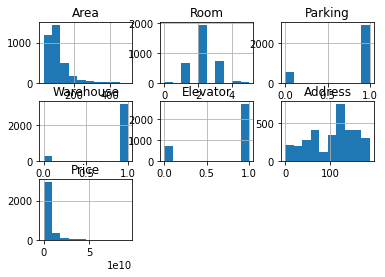

In [69]:
plt.figure(figsize=(40,30))
df.hist()
plt.show()

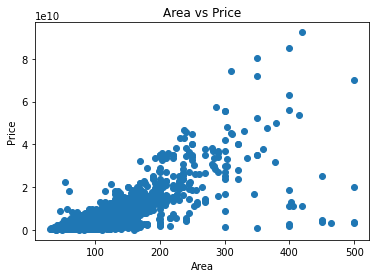

In [73]:
#df2 = df.sort_values(by=['Price'])
plt.scatter(df['Area'],df['Price'])
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Creating train and test dataset

In [16]:
x = df.drop(["Price"],axis=1)
y = df["Price"]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2580, 6) (645, 6) (2580,) (645,)


### Modeling

In [18]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train, y_train)

LinearRegression()

### Evaluation

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(x_test)
test_y = np.asanyarray(y_test)
test_y_ = ln.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2527851462.89
Residual sum of squares (MSE): 19500830476488974336.00
R2-score: 0.69


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
